In [2]:
import csv
import os

os.chdir('../../..')

files = ["results/results_MUC_simplified/first-few/en/CEAF-RME-greedy.csv", "results/results_MUC_simplified_70B/first-few/en/CEAF-RME-greedy.csv", "results/steps-MUC-RME-greedy.csv", "results/steps-MUC-RME-greedy_70B.csv"]
data = []
for file in files:
    with open(file, 'r') as f:
        reader = csv.reader(f)
        header = next(reader)
        rows = list(reader)
        if "REE" in file:
            col_index = header.index("micro_avg")
        else:
            col_index = header.index("f1")
        iter = 0
        file_data = []
        prev_k = -1
        for row in rows:
            k = int(row[0])
            file_data.append(row[col_index])
            while k - 1 != prev_k:
                prev_k +=1
                file_data.append(row[col_index])
            prev_k = k
        data.append(file_data)

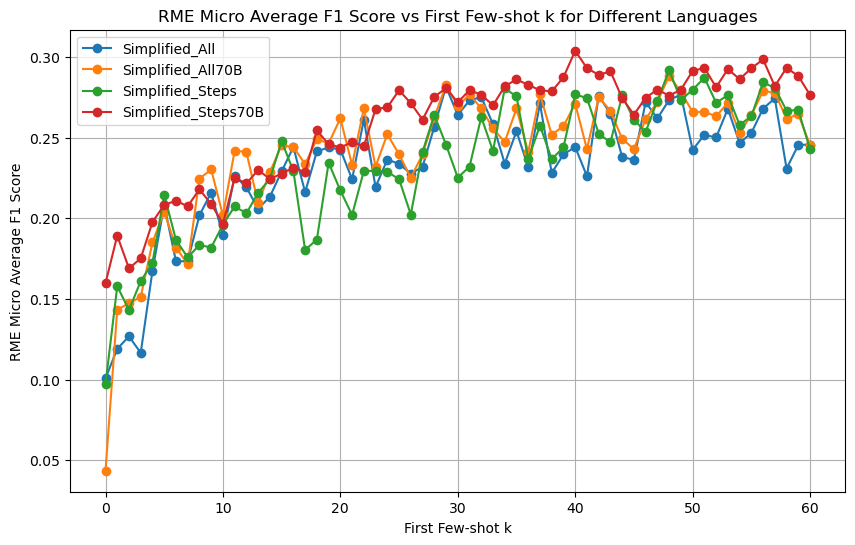

In [3]:
import matplotlib.pyplot as plt

tags = ["Simplified_All", "Simplified_All70B","Simplified_Steps", "Simplified_Steps70B"]

# Plot the results from the 4 CSV files
plt.figure(figsize=(10, 6))
ks = list(range(0,61))



# Plot each file's data
for i, tag in enumerate(tags):
    plt.plot(ks, [float(score) for score in data[i]], marker='o', label=tag)

plt.xlabel('First Few-shot k')
plt.ylabel('RME Micro Average F1 Score')
plt.title('RME Micro Average F1 Score vs First Few-shot k for Different Languages')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import csv

files = ["results/steps-MUC-RME-greedy_deepseek.csv", "results/steps-MUC-RME-greedy_deepseekV2.csv"]
data = []
for file in files:
    with open(file, 'r') as f:
        reader = csv.reader(f)
        header = next(reader)
        rows = list(reader)
        if "REE" in file:
            col_index = header.index("micro_avg")
        else:
            col_index = header.index("f1")
        iter = 0
        file_data = []
        for row in rows:
            k = int(row[0])
            file_data.append(row[col_index])
        data.append(file_data)

In [5]:
print(data)

[['0.1598214285714286', '0.15673981191222572', '0.1923284710967045', '0.19476567255021301', '0.18079800498753115', '0.1769331585845347', '0.20341207349081367', '0.21608040201005024', '0.2101990049751244', '0.20509633312616532', '0.20975283901135602', '0.22538699690402475', '0.21919584954604407', '0.22090729783037477'], ['0.15975885455915598', '0.15300546448087432', '0.19999999999999998', '0.17438271604938269', '0.15120274914089346', '0.165', '0.22939560439560439', '0.21045096635647817', '0.19178082191780824', '0.20459016393442622', '0.22646657571623466', '0.21966794380587484', '0.20028011204481797', '0.18809698750918444']]


14


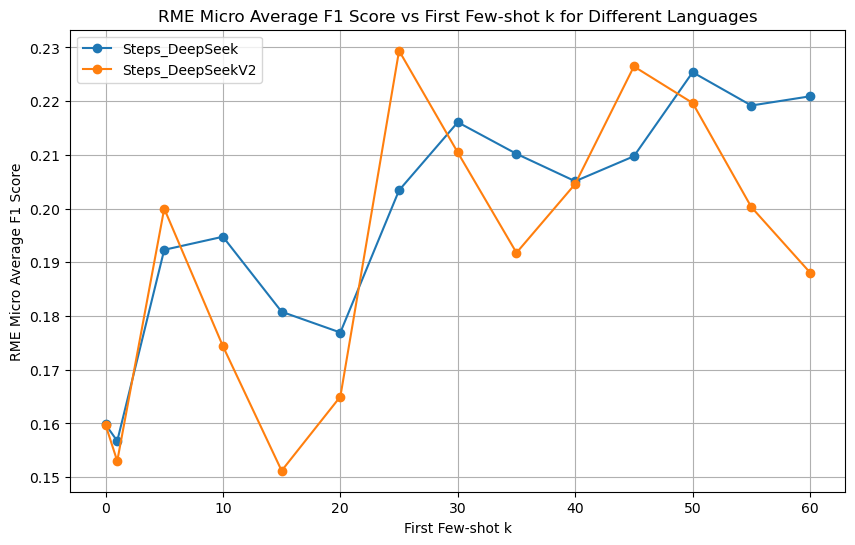

In [6]:
import matplotlib.pyplot as plt

tags = ["Steps_DeepSeek", "Steps_DeepSeekV2"]
print(len(data[0]))
# Plot the results from the 4 CSV files
plt.figure(figsize=(10, 6))
ks = [0,1,5,10,15,20,25,30,35,40,45,50,55,60]


# Plot each file's data
for i, tag in enumerate(tags):
    plt.plot(ks, [float(score) for score in data[i]], marker='o', label=tag)

plt.xlabel('First Few-shot k')
plt.ylabel('RME Micro Average F1 Score')
plt.title('RME Micro Average F1 Score vs First Few-shot k for Different Languages')
plt.legend()
plt.grid(True)
plt.show()